In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv("data_tidied.csv")

In [37]:
df.head()

,Unnamed: 0,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,1,12.6,1.0708,23,70.03,172.08,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,2,6.9,1.0853,22,78.66,183.52,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,3,24.6,1.0414,22,69.92,168.28,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,4,10.9,1.0751,26,83.88,183.52,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,5,27.8,1.0340,24,83.65,180.98,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 18 columns):
Unnamed: 0    247 non-null int64
IDNO          247 non-null int64
BODYFAT       247 non-null float64
DENSITY       247 non-null float64
AGE           247 non-null int64
WEIGHT        247 non-null float64
HEIGHT        247 non-null float64
ADIPOSITY     247 non-null float64
NECK          247 non-null float64
CHEST         247 non-null float64
ABDOMEN       247 non-null float64
HIP           247 non-null float64
THIGH         247 non-null float64
KNEE          247 non-null float64
ANKLE         247 non-null float64
BICEPS        247 non-null float64
FOREARM       247 non-null float64
WRIST         247 non-null float64
dtypes: float64(15), int64(3)
memory usage: 34.8 KB


In [39]:
df.describe()

,Unnamed: 0,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,247.00000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,124.00000,126.761134,19.036032,1.055175,44.761134,81.050486,178.558138,25.398381,37.959919,100.776518,92.457490,99.786640,59.395142,38.573279,23.098381,32.271660,28.689069,18.220243
std,71.44695,73.184056,7.567761,0.018371,12.488191,12.072566,6.522083,3.316624,2.267957,8.027084,10.121374,6.439091,4.881671,2.293738,1.646133,2.887639,2.008539,0.899907
min,1.00000,1.000000,4.100000,0.995000,22.000000,56.750000,162.560000,19.100000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,62.50000,63.500000,13.250000,1.041400,35.500000,72.300000,173.670000,23.150000,36.400000,94.500000,84.900000,95.550000,56.100000,37.050000,22.000000,30.250000,27.300000,17.600000
50%,124.00000,127.000000,19.000000,1.054900,43.000000,80.240000,177.800000,25.100000,38.000000,99.700000,90.900000,99.300000,59.000000,38.500000,22.800000,32.100000,28.700000,18.300000
75%,185.50000,190.500000,24.600000,1.069800,54.000000,89.380000,183.520000,27.350000,39.400000,105.300000,99.450000,103.350000,62.400000,39.900000,24.000000,34.350000,30.000000,18.800000
max,247.00000,252.000000,45.100000,1.092600,74.000000,119.290000,196.850000,39.100000,43.900000,128.300000,126.200000,125.600000,74.400000,46.000000,33.900000,39.100000,34.900000,21.400000


In [47]:
# Split data into training and test sets
y = df.BODYFAT
X = df.drop(['BODYFAT','DENSITY','ADIPOSITY','Unnamed: 0','IDNO'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [48]:
# Implement Random Forets Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
pred = rf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.6199228654328093
21.338936619999984


In [50]:
rf.feature_importances_

array([0.02267089, 0.02268255, 0.04527906, 0.01810416, 0.02316505,
       0.7229659 , 0.01946421, 0.01770368, 0.0213086 , 0.02451096,
       0.02396614, 0.01428129, 0.02389751])

Text(0.5, 0, 'Random Forest Feature Importance')

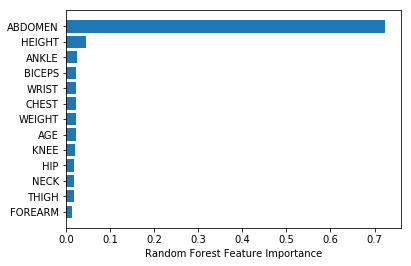

In [51]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns.values[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [52]:
# Save model for future use
joblib.dump(rf, 'rf_regressor.pkl')
# Predict data set using loaded model
rf2 = joblib.load('rf_regressor.pkl')
 
# Predict new data by clf2.predict(newdata)